In [7]:
%matplotlib notebook

import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
client = Client("IRIS")

In [24]:
#waveform functions to make importing data easier
def waveforms(starttime, adj_endtime):
    start_t = UTCDateTime(starttime)
    end_t = start_t + adj_endtime
    event_st = client.get_waveforms("XB", "ELYSE", "02", "B*", start_t, end_t)
    return event_st

def waveform_plotter(date, stream, filtered, event, channels = [0]):
    d = date[0:10]
    tr = stream[0]
    t = tr.times('matplotlib')
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    for channel in channels:
        ax.plot(t, filtered[channel])
    
    ax.xaxis_date()
    fig.autofmt_xdate()
    
    ax.set_xlabel("UTC " + d, size=12)
    fig.suptitle("SO" + event)
    return fig, ax
    
def waveform_filter(stream, event_type):
    
    stream.detrend('linear')
    stream.taper(max_percentage=0.05, type='cosine')
    
    if event_type == 'lf' or 'bb':
        filtered_stream1 = stream.filter('bandpass', freqmin = 0.125, freqmax = 0.5)
        return filtered_stream1
    elif event_type == 'hf':
        filtered_stream2 = stream.filter('highpass', freq = 1)
        return filtered_stream2
    elif event_type == '2.4':
        filtered_stream3 = stream.filter('bandpass', freqmin = 1, freqmax = 4)
        return filtered_stream3
    elif event_type == 'shf':
        filtered_stream4 = stream.filter('bandpass', freqmin = 8, freqmax = 15)
        return filtered_stream4
    elif event_type == 'vhf':
        filtered_stream5 = stream.filter('bandpass', freqmin == 5, freqmax = 10)
        return filtered_stream5
    else:
        text = "This isn't a valid event type"
        return text

***
***
***

# S0377c (C)
### 2019-12-19T11:57:20
Energy Start @ 12:00:08

<IPython.core.display.Javascript object>


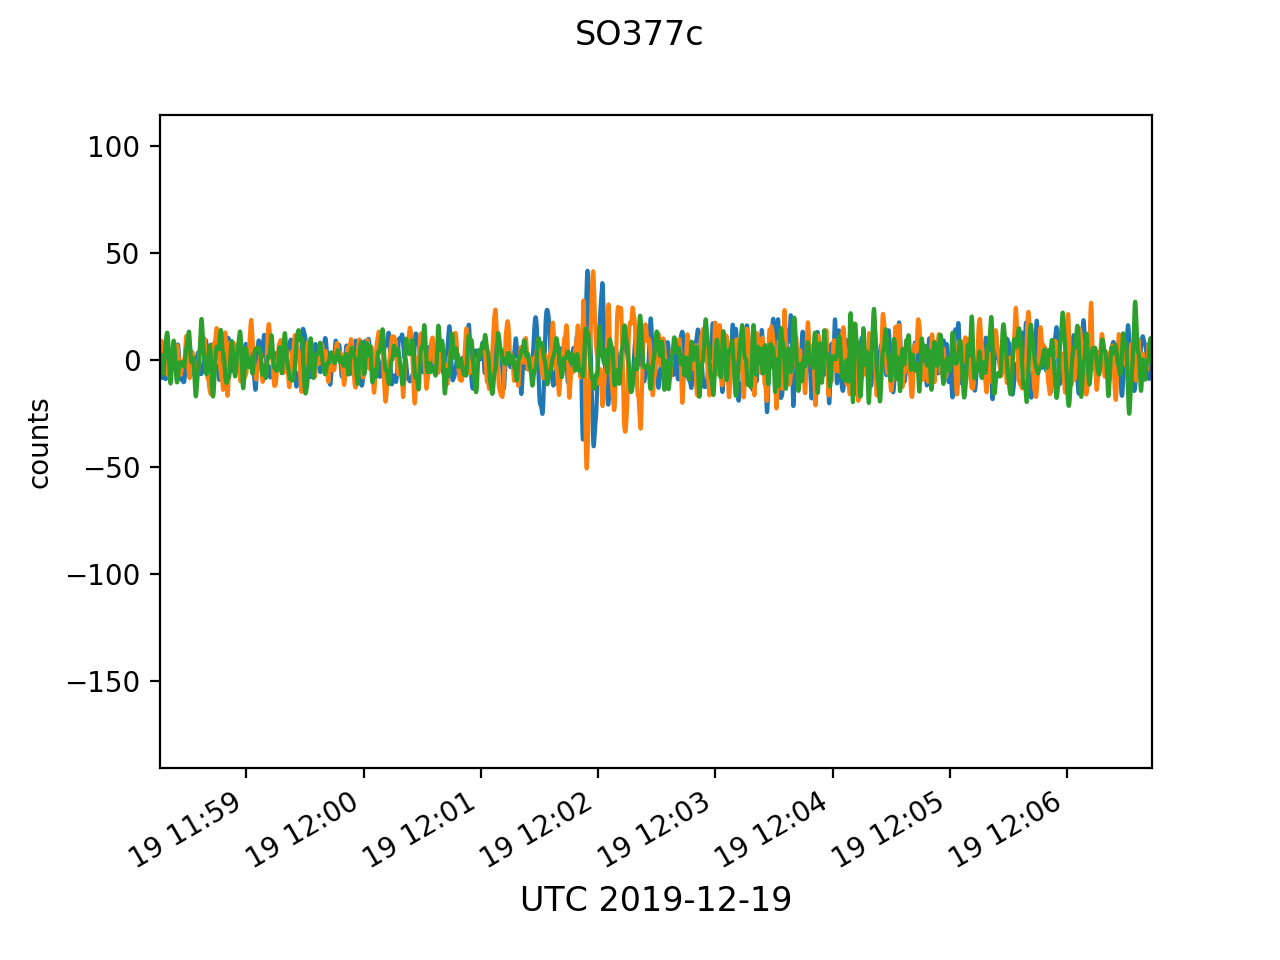

In [26]:
t_377c = "2019-12-19T11:50:20"
st_377c = waveforms(t_377c, 2700)
f_377c = waveform_filter(st_377c, 'lf')
fig, ax = waveform_plotter(t_377c, st_377c, f_377c, '377c', channels= [0,1,2])
ax.set_ylabel('counts')
plt.show()

***
***

# S0357a (D)
### 2019-11-28T19:22:00
Energy Start @ 19:24:59

P @ 19:25:02

<IPython.core.display.Javascript object>


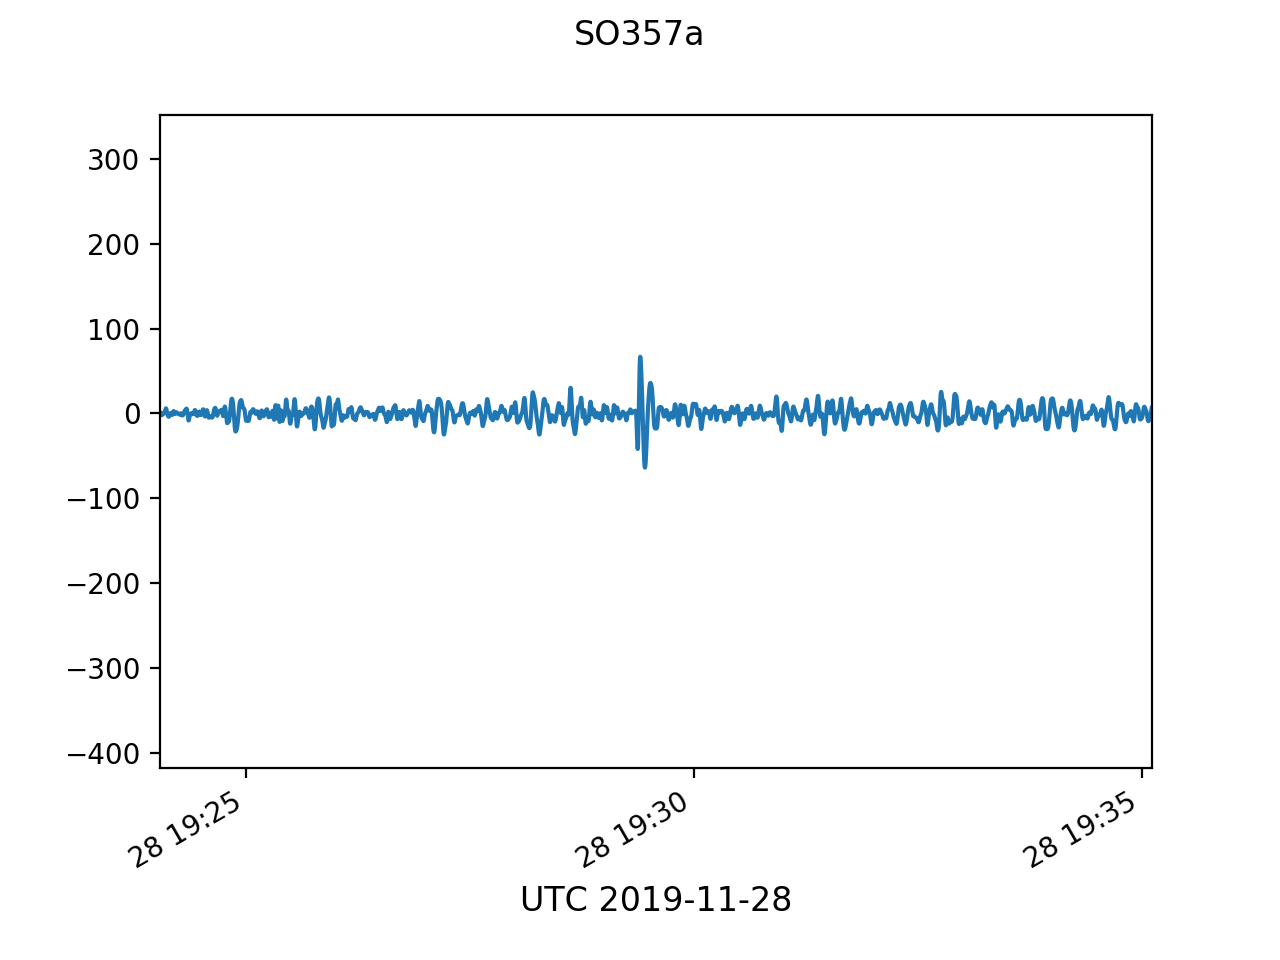

In [11]:
t_357a = "2019-11-28-T19:19:00"
st_357a = waveforms(t_357a, 2700)
f_357a = waveform_filter(st_357a, 'lf')
waveform_plotter(t_357a, st_357a, f_357a, 0, '357a')

***
***

# S0345a (D)
### 2019-11-16T12:03:41
Energy Start @ 12:06:04

<IPython.core.display.Javascript object>


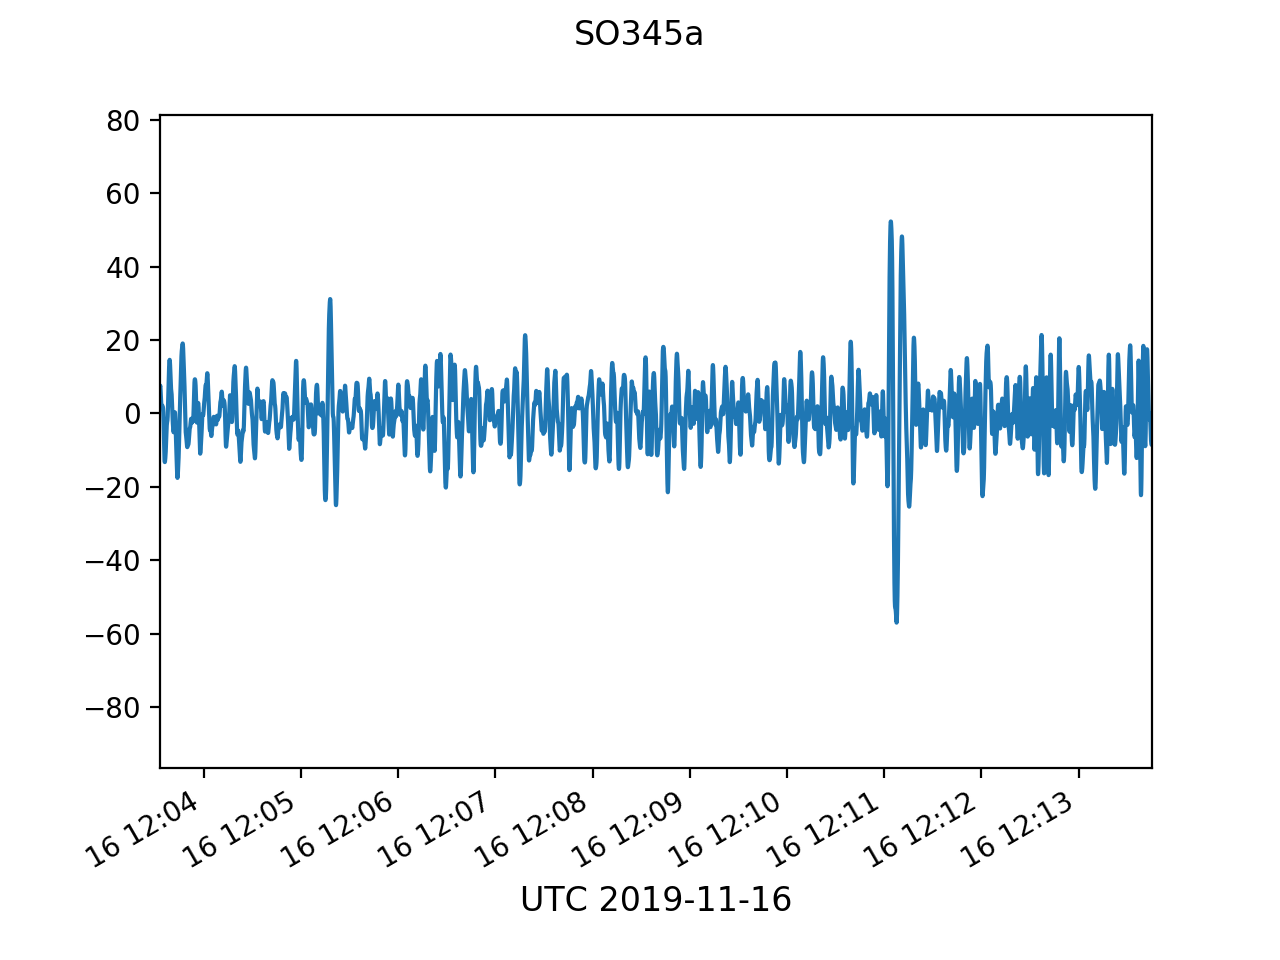

In [13]:
t_345a = "2019-11-16T11:58:41"
st_345a = waveforms(t_345a, 7200)
f_345a = waveform_filter(st_345a, 'lf')
waveform_plotter(t_345a, st_345a, f_345a, 1, '345a')

***
***

# S0330a (D)
### 2019-10-31T10:05:39
Energy Start @ 10:20:08

<IPython.core.display.Javascript object>


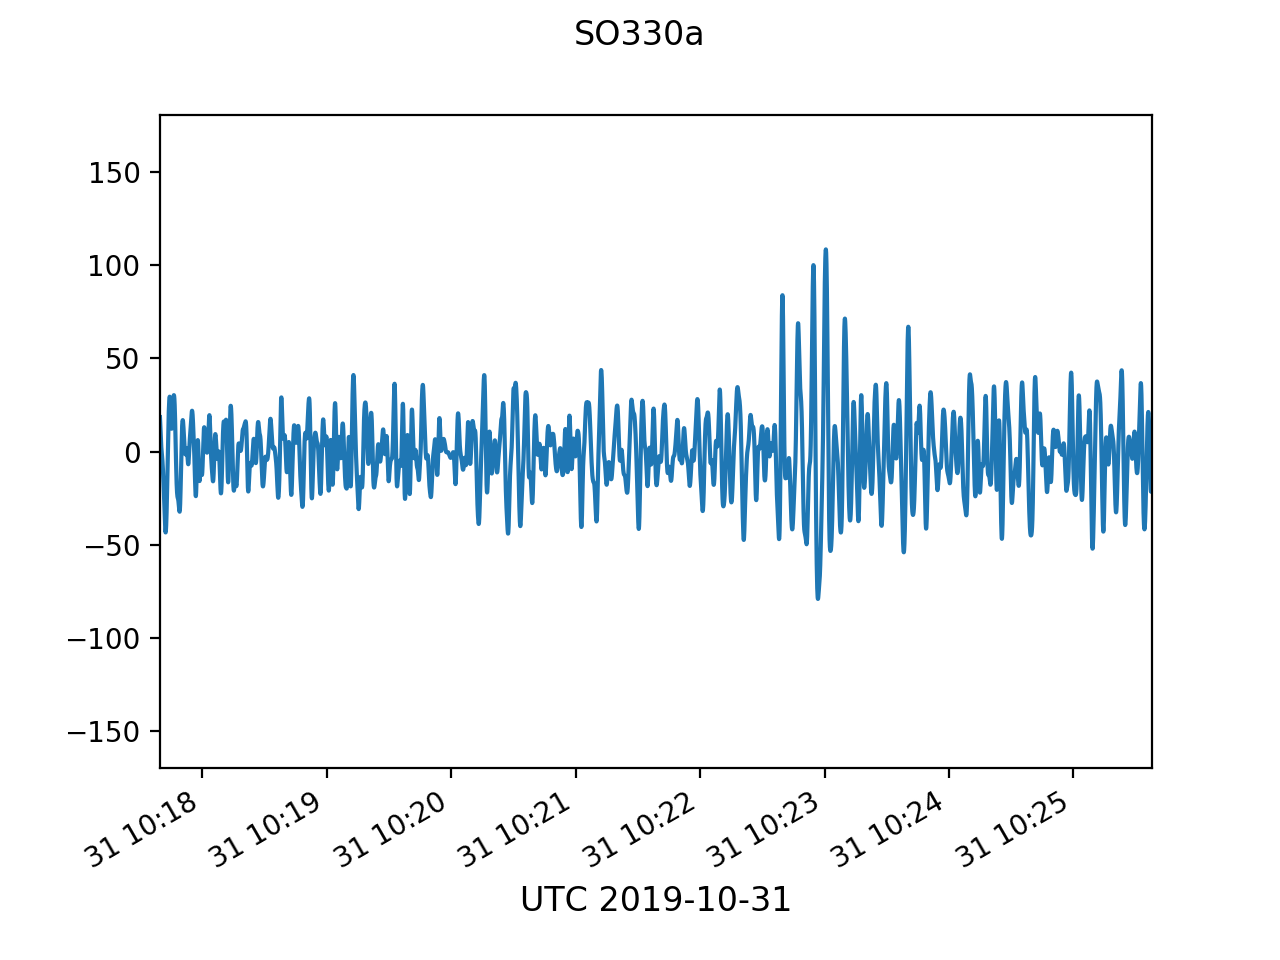

In [14]:
t_330a = "2019-10-31T10:05:39"
st_330a = waveforms(t_330a, 7200)
f_330a = waveform_filter(st_330a, 'lf')
waveform_plotter(t_330a, st_330a, f_330a, 0, '330a')

***
***

# S0329b (D)
### 2019-10-31T00:42:58
Energy Start @ 00:44:20

<IPython.core.display.Javascript object>


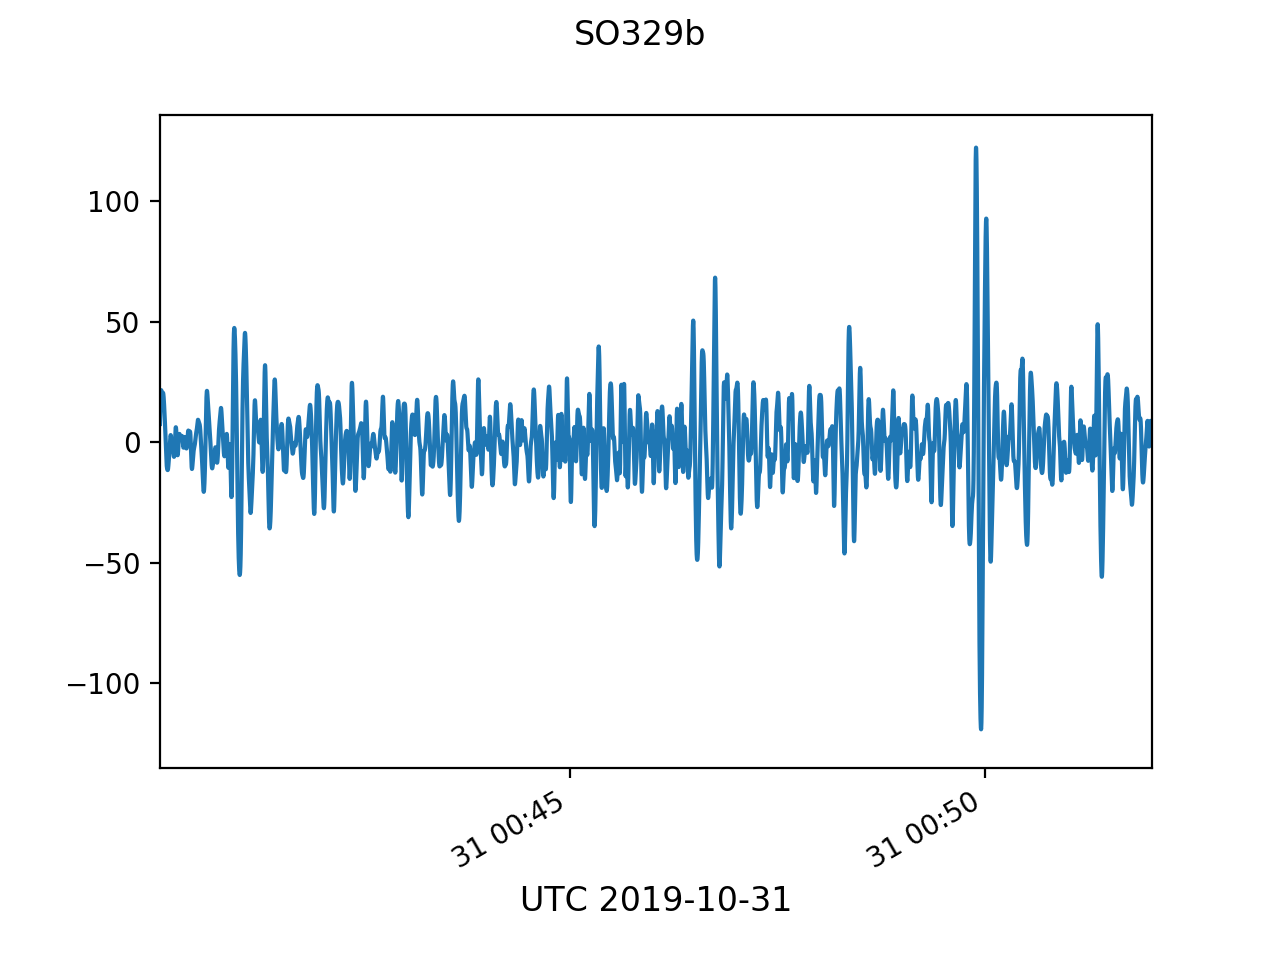

In [19]:
t_329b = "2019-10-31T00:35:58"
st_329b = waveforms(t_329b, 7200)
f_329b = waveform_filter(st_329b, 'lf')
waveform_plotter(t_329b, st_329b, f_329b, 0, '329b')

***
***

# S0327d (D)
### 2019-10-29T04:20:35
Energy Start @ 04:21:53

<IPython.core.display.Javascript object>


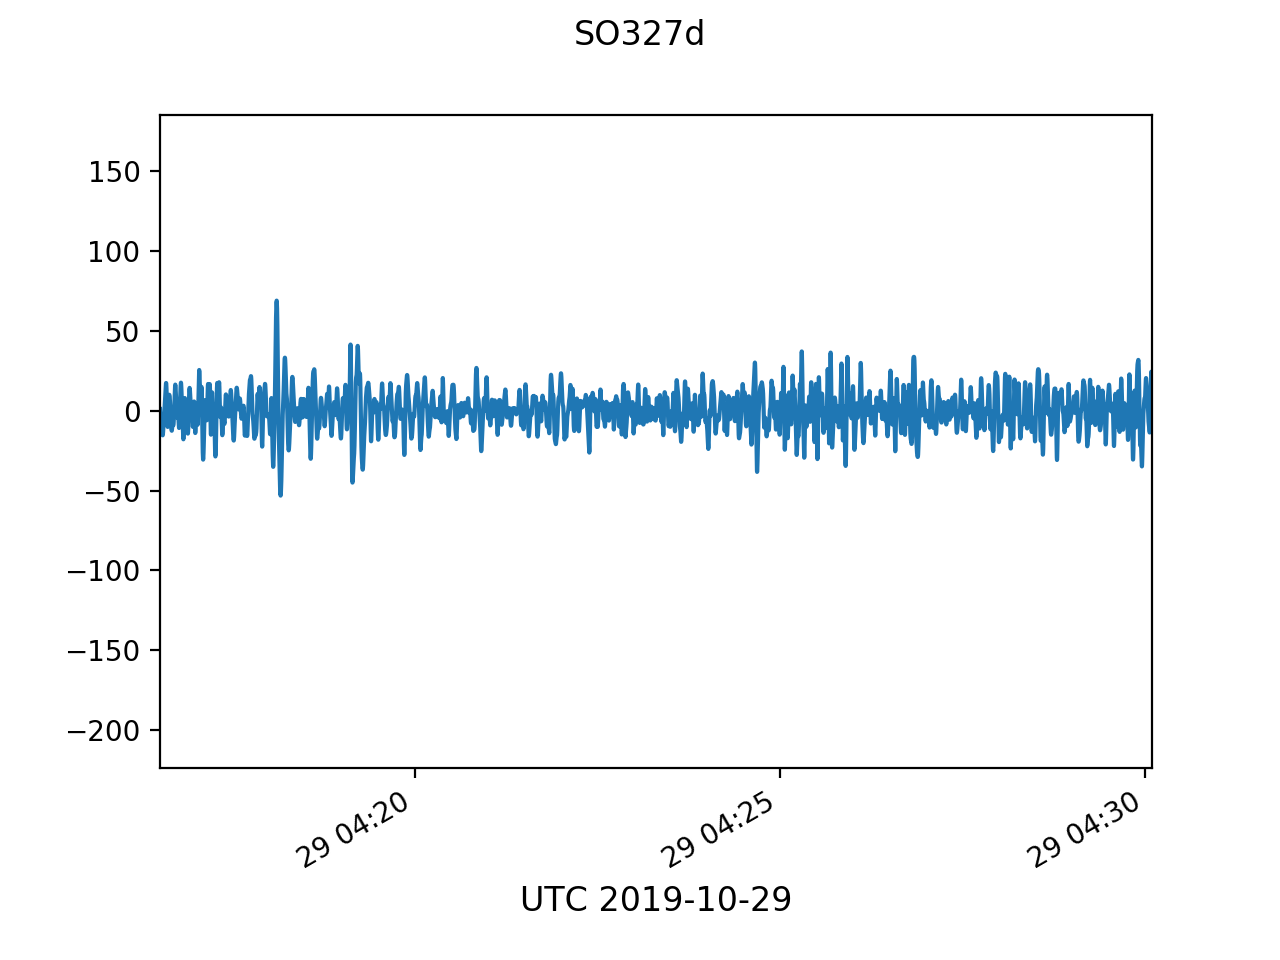

In [20]:
t_327d = "2019-10-29T04:10:35"
st_327d = waveforms(t_327d, 2700)
f_327d = waveform_filter(st_327d, 'lf')
waveform_plotter(t_327d, st_327d, f_327d, 0, '327d')

***
***

# S0323d (D)
### 2019-10-25T00:20:29
Energy Start @ 00:26:42

***
***

# S00320b (D)
### 2019-10-21T20:09:07
Energy Start @ 20:14:42

***
***

# S0290b <span style='color:Orange'> (B)  </span>
### 2019-09-21T03:15:42
Energy Start @ 03:19:05

P @ 03:19:09

S @ 03:22:04

***
***
# S00254b (D)
### 2019-08-15T03:06:01
Energy Start @ 03:08:04

***
***
# S0251a (D)
### 2019-08-15T03:06:01
Energy Start @ 03:08:04

***
***
# S0251a (D)
### 2019-08-11T23:06:24
Energy Start @ 23:07:15

***
***
# S0240a (D)
### 2019-07-31T14:45:05
Energy Start @ 14:45:38

***
***
# S0234c (D)
### 2019-07-25T12:53:37
Energy Start @ 12:54:18

***
***
# S0226b (C)
### 2019-07-17T05:36:45
Energy Start @ 05:43:38

***
***
# S0205a (D)
### 2019-06-25T17:10:10
Energy Start @ 17:09:43

***
***
# S0201a (D)
### 2019-06-21T12:52:03
Energy Start @ 12:52:02

***
***
# S0189a <span style='color:Orange'> (B)  </span>
### 2019-06-09T05:37:50
Energy Start @ 05:40:05

P @ 05:40:05

S @ 05:43:19

***
***
# S0183a (C)
### 2019-06-03T02:27:46
Energy Start @ 02:27:47

***
***
# S0173a <span style='color:Red'> (A)  </span>
### 2019-05-23T02:19:33
Energy Start @ 02:22:48

P @ 02:22:59

S @ 02:25:53

<IPython.core.display.Javascript object>


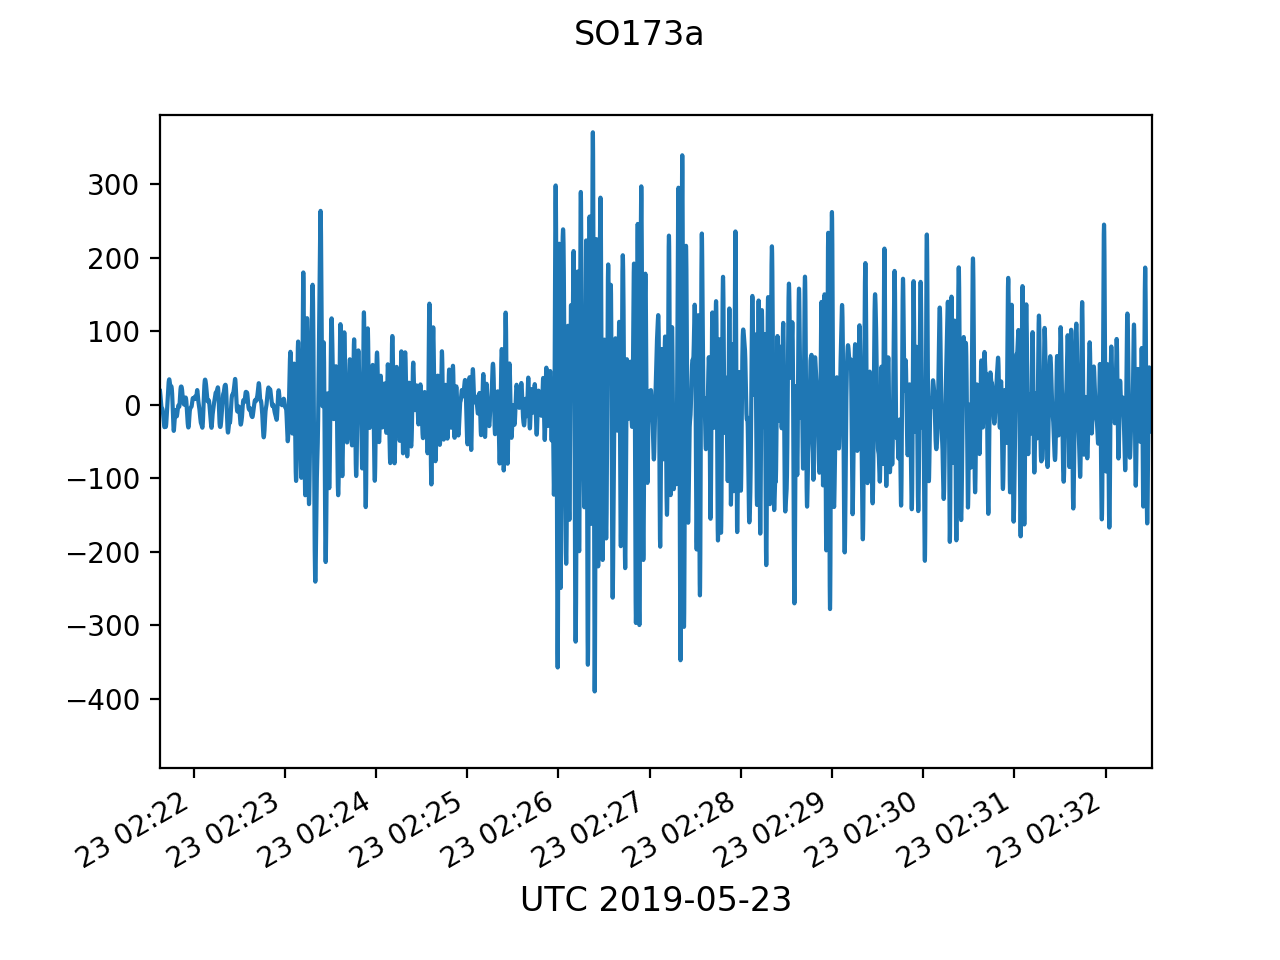

In [29]:
t_173a = "2019-05-23T02:10:33"
st_173a = waveforms(t_173a, 2700)
f_173a = waveform_filter(st_173a, 'lf')
fig, ax = waveform_plotter(t_173a, st_173a, f_173a, '173a', channels=[1])

***
***
# S0171a (D)
### 2019-05-21T18:54:03
Energy Start @ 18:56:52

***
***
# S0167b (C)
### 2019-05-17T16:29:32
Energy Start @ 19:30:04

***
***
# S0167a (C)
### 2019-05-17T16:39:32
Energy Start @ 16:47:15

***
***
# S0105a <span style='color:Orange'> (B)  </span>
### 2019-03-14T20:59:38
Energy Start @ 21:03:28